# A Clean Place is a Safe Place

<font color='blue' size='5'><strong>Data Cleaning And Feature Engineering</strong></font>

<img src='https://i.imgur.com/4pgviBX.jpg'><center>Image souce:digitalvidya.com</center>

<ul style="font-family:'Georgia';font-size:18px" >
<strong><h3>Table of Content</h3> </strong>
<br>
<br>
<li>Inporting Libraries
<li>Memory reduction techniques
<li> Feature Engineering and Process Member data
<li> Feature Engineering and Process Transaction data
<li> Feature Engineering and Process user logs data
<li> Combining All to create pipeline for single data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc 
import warnings
import dask.dataframe as dd
from matplotlib.pyplot import figure
sns.set()
warnings.filterwarnings("ignore")

<font color='blue' size='2'><strong>Memory Reducing Technique</strong></font>

In [2]:
def adjust_datatype(df):
    """
    This function adjust the datatypes of columns based upon their range
    
    Input take DataFrame
    
    example:
    if a column's maximum and minimum values are in range of (-128 to 127) then datatype
    to store that column is changed to int8
    
    Reference:
    https://www.kaggle.com/jeru666/did-you-think-of-these-features
    
    """
    int_cols = list(df.select_dtypes(include=['int']).columns)
    for col in int_cols:
        if ((np.max(df[col]) <= 127) and (np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and (np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and (np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)          
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)
        
        
        
        
        
def restart_kernel():
    """
    Used to get rid of unnessary variable
    
    https://stackoverflow.com/questions/37751120/restart-ipython-kernel-with-a-command-from-a-cell
    """
    from IPython.core.display import HTML
    HTML("<script>Jupyter.notebook.kernel.restart()</script>")
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import gc 
    import warnings
    import dask.dataframe as dd
    from matplotlib.pyplot import figure
    sns.set()
    warnings.filterwarnings("ignore")

<font color='blue' size='5'><strong>Process and Feature engineering </strong></font><br>
<font color='blue' size='5'><strong>Member Data </strong></font>

In [3]:
member_data=pd.read_csv('/home/asad_99rizvi/dataset/members_v3.csv',parse_dates=['registration_init_time'])
member_data.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [4]:
member_data.shape

(6769473, 6)


We have seen in EDA<br>
Gender has NaN values<br>
registration via has negative values<br>
Age has ouliers


In [5]:
member_data.drop('gender',axis=1,inplace=True)

member_data['registered_via']=member_data['registered_via'].apply(lambda x:np.nan if x < 0 else x)
member_data['registered_via']=member_data.groupby('city')['registered_via'].transform(lambda x: x.fillna(x.value_counts().index[0]))
registered_via_mode=member_data['registered_via'].value_counts().index[0]

member_data['bd']=member_data['bd'].apply(lambda x :np.nan if (x <=0 or x >100) else x)
age_mean=member_data['bd'].mean()
member_data['bd'].fillna(age_mean,inplace=True)

Merging data for visulatisation

In [6]:
train_data=pd.read_csv('/home/asad_99rizvi/dataset/train_v2.csv')
train_member=pd.merge(train_data,member_data,on='msno',how='left')
train_member.dropna(inplace=True)
adjust_datatype(train_member)

[]

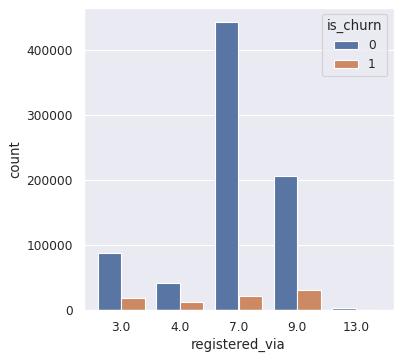

In [7]:
figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data=train_member,x='registered_via',hue='is_churn')
plt.plot()

<strong>Feature : registration_flag</strong>
<br>
checks if user uses registration method 7 and 9

In [8]:
member_data['registration_flag']=member_data['registered_via'].apply(lambda x :1 if (x==7 or x==9) else 0)

[]

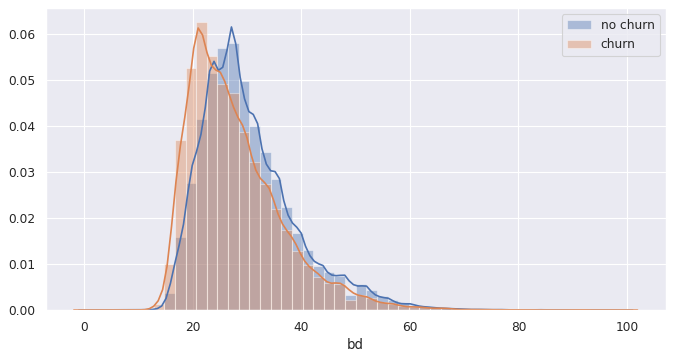

In [9]:
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
non_churn=train_member[(train_member['bd']>0)&(train_member['bd']<100)&(train_member['bd']!=29.487728)&(train_member['is_churn']==0)]['bd']
churn=train_member[(train_member['bd']>0)&(train_member['bd']<100)&(train_member['bd']!=29.487728)&(train_member['is_churn']==1)]['bd']
sns.distplot(non_churn,label='no churn')
sns.distplot(churn,label='churn')
plt.legend()
plt.plot()

<strong>Feature :age flag</strong>
<br>
capture if person is age between 20 to 24

In [10]:
member_data['age_flag']=member_data['bd'].apply(lambda x :1 if (x>=20 and x<=24) else 0)

<AxesSubplot:xlabel='city', ylabel='count'>

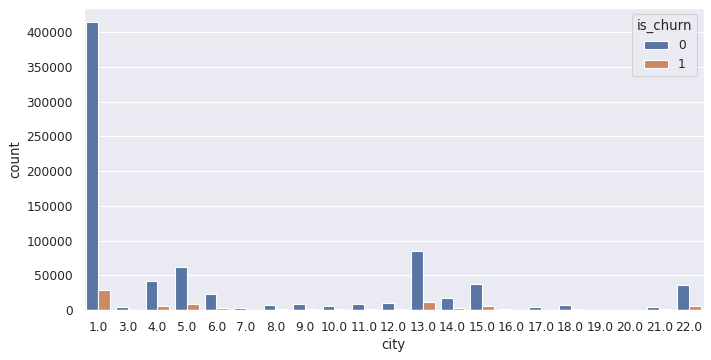

In [11]:
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(train_member['city'],hue=train_member['is_churn'])

<strong>Feature :city_flag</strong>
<br>
capture if city is 1 or 13

In [12]:
member_data['city_flag']=member_data['city'].apply(lambda x:1 if (x==1 or x==13) else 0 )

distributing date into year , month,day, weekday

In [13]:
member_data["year"]=member_data['registration_init_time'].dt.year
member_data['month']=member_data['registration_init_time'].dt.month
member_data['day']=member_data['registration_init_time'].dt.day
member_data['weekday']=member_data['registration_init_time'].dt.weekday
member_data.drop('registration_init_time',axis=1,inplace=True)

<strong>Feature :month flag</strong>
<br>
flags month 4,5 and 6

In [14]:
member_data['month_flag']=member_data['month'].apply(lambda x:0 if (x==4 or x==5 or x==6) else 1 )

<strong>Feature :year_flag</strong>
<br>
flag year above 2014

In [15]:
member_data['year_flag']=member_data['year'].apply(lambda x:0 if x>2014 else 1 )

Final member_data 

In [25]:
member_data.drop(labels=['month','day','weekday'],inplace=True,axis=1)

In [26]:
member_data.head()

,msno,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,year_flag
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,29.487727,11.0,0,0,1,2011,1,1
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,29.487727,7.0,1,0,1,2011,1,1
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,29.487727,11.0,0,0,1,2011,1,1
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,29.487727,11.0,0,0,1,2011,1,1
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32.000000,9.0,1,0,0,2011,1,1


In [28]:
member_data.shape

(6769473, 10)

In [30]:
member_data.to_csv('/home/asad_99rizvi/dataset/member_data_features.csv')

In [10]:
restart_kernel()

<font color='blue' size='5'><strong>Process and Feature engineering </strong></font><br>
<font color='blue' size='5'><strong>Transaction data </strong></font>

In [149]:
transaction_v1=pd.read_csv('/home/asad_99rizvi/dataset/transactions.csv')
transaction_v2=pd.read_csv('/home/asad_99rizvi/dataset/transactions_v2.csv')

adjust_datatype(transaction_v1)
adjust_datatype(transaction_v2)

transaction_merged=pd.concat([transaction_v1,transaction_v2],ignore_index=True)
adjust_datatype(transaction_merged)

transaction_merged.to_csv('/home/asad_99rizvi/dataset/transaction_merged.csv',index=False)

restart_kernel()

In [5]:
transaction=pd.read_csv('/home/asad_99rizvi/dataset/transaction_merged.csv',parse_dates=['transaction_date','membership_expire_date'])

adjust_datatype(transaction)
transaction=transaction.drop_duplicates()

transaction.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


In [6]:
transaction.shape

(22975416, 9)

<strong>Feature : days_diff</strong>
<br>
difference between membership expire date and transaction date
<strong>Feature : duration</strong>
<br>
duration of plan(actual)

In [7]:
temp=(transaction['membership_expire_date']-transaction['transaction_date'])/transaction['payment_plan_days']
transaction['days_diff']=temp.apply(lambda x :x.days)
temp=transaction['membership_expire_date']-transaction['transaction_date']
transaction['duration']=temp.apply(lambda x :x.days)

<strong>Feature : is_cancel_change_flag</strong>
<br>
Captures if user changed its is_cancel state

In [8]:
is_cancel_change_flag=transaction.groupby('msno')['is_cancel'].max()

<strong>Feature : is_auto_renew_change</strong>
<br>
Captures if user changed its auto_renew state

In [9]:
is_auto_renew_change_flag=transaction.groupby('msno')['is_auto_renew'].max()

<strong>Feature : transaction_count</strong>
<br>
How many Transactions user had done in past

In [10]:
transaction_count=transaction.groupby('msno')['payment_method_id'].count()

<strong>Feature :average_amount_paid </strong>
<br>
Average amount paid by user (Theorotical)

In [11]:
average_amount_paid=transaction.groupby('msno')['actual_amount_paid'].mean()

<strong>Feature : average_amount_charged</strong>
<br>
Average amount charged on user (actual)

In [12]:
average_amount_charged=transaction.groupby('msno')['plan_list_price'].mean()

<strong>Feature : difference </strong>
<br>
Discount given to customer

In [13]:
difference=average_amount_paid-average_amount_charged
difference=difference.rename("difference")

<strong>Feature : aveage_plan</strong>
<br>
Average plan of customer in days

In [14]:
average_plan=transaction.groupby('msno')['payment_plan_days'].mean()

<strong>Feature : change_in_method</strong>
<br>
Captures if payment method is changed

In [15]:
change_in_method=transaction.groupby('msno')['payment_method_id'].nunique()

<strong>Feature :change_in_plan </strong>
<br>
captures how many times plan is changed

In [16]:
change_in_plan=transaction.groupby('msno')['payment_plan_days'].nunique()

<strong>Feature : change_in_price</strong>
<br>
how many time customer change its plan (Theortical)

In [17]:
change_in_price=transaction.groupby('msno')['plan_list_price'].nunique()

<strong>Feature :change_in_price_paid </strong>
<br>
how many time customer change its plan (actual)

In [18]:
change_in_price_paid=transaction.groupby('msno')['actual_amount_paid'].nunique()

<strong>Feature : duration </strong>
<br>
Average duration

In [19]:
duration=transaction.groupby('msno')['duration'].mean()

<strong>Feature : sum_plan_days</strong>
<br>
Total plan in days

In [20]:
sum_plan_days=transaction.groupby('msno')['payment_plan_days'].sum()

<strong>Feature :sum_list_price </strong>
<br>
sum of all prices (Theoretical)

In [21]:
sum_list_price=transaction.groupby('msno')['plan_list_price'].sum()

<strong>Feature : sum_amount_paid</strong>
<br>
sum of all prices (actual)

In [22]:
sum_amount_paid=transaction.groupby('msno')['actual_amount_paid'].sum()

<strong>Feature : more_than_30</strong>
<br>
falgs if the difference in days if more than 30

In [23]:
transaction['more_than_30']=transaction['days_diff'].apply(lambda x:1 if x>30 else 0)
more_than_30=transaction.groupby('msno')['more_than_30'].sum()

<strong>Feature : autorenew_not_cancel</strong>
<br>
logical operation auto_renew NOT is cancel

In [24]:
transaction["autorenew_not_cancel"]=((transaction['is_auto_renew'] == 1) == (transaction['is_cancel'] == 0)).astype(np.int8)
autorenew_not_cancel=transaction.groupby('msno')['autorenew_not_cancel'].min()

<strong>Feature : not_autorenew_cancel</strong>
<br>
Logical operation NOT autorenew AND is cancel

In [25]:
transaction["not_autorenew_cancel"]=((transaction['is_auto_renew'] == 0) == (transaction['is_cancel'] == 1)).astype(np.int8)
not_autorenew_cancel=transaction.groupby('msno')['not_autorenew_cancel'].min()

In [26]:
features=[
    is_cancel_change_flag,is_auto_renew_change_flag,transaction_count,average_amount_paid,average_amount_charged
    ,difference,average_plan,change_in_method,change_in_plan,change_in_price,change_in_price_paid,duration,sum_plan_days,sum_list_price
    ,sum_amount_paid,more_than_30,autorenew_not_cancel,not_autorenew_cancel
]

In [27]:
from functools import reduce
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
transaction_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), features)

In [28]:
features_names=[
    "is_cancel_change_flag","is_auto_renew_change_flag","transaction_count","average_amount_paid","average_amount_charged"
    ,"difference","average_plan","change_in_method","change_in_plan","change_in_price","change_in_price_paid","duration",
    "sum_plan_days","sum_list_price","sum_amount_paid","more_than_30","autorenew_not_cancel","not_autorenew_cancel"
]

In [29]:
transaction_feature.columns=features_names

In [30]:
transaction_feature.head()

,is_cancel_change_flag,is_auto_renew_change_flag,transaction_count,average_amount_paid,average_amount_charged,difference,average_plan,change_in_method,change_in_plan,change_in_price,change_in_price_paid,duration,sum_plan_days,sum_list_price,sum_amount_paid,more_than_30,autorenew_not_cancel,not_autorenew_cancel
msno,,,,,,,,,,,,,,,,,,
+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0,0,1,0.0,0.000000,0.000000,7.000000,1,1,1,1,5.000000,7,0.0,0.0,0,0,0
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,0,2,1693.5,1693.500000,0.000000,402.500000,2,2,2,2,440.500000,805,3387.0,3387.0,0,0,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,1,5,99.0,99.000000,0.000000,30.000000,1,1,1,1,30.000000,150,495.0,495.0,0,1,1
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,1,21,149.0,141.904762,7.095238,28.714286,1,3,2,1,49.095238,603,2980.0,3129.0,0,1,1
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,1,27,149.0,143.481481,5.518519,28.888889,1,2,2,1,30.407407,780,3874.0,4023.0,0,1,1


In [31]:
transaction_feature.shape

(2426143, 18)

In [32]:
transaction_feature.to_csv('/home/asad_99rizvi/dataset/transaction_features.csv')

In [33]:
restart_kernel()

<font color='blue' size='5'><strong>Process and Feature engineering </strong></font><br>
<font color='blue' size='5'><strong>User Logs </strong></font>

In [2]:
user_logs=pd.read_csv("/home/asad_99rizvi/dataset/user_logs_v2.csv",parse_dates=['date'])
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558


We will make month wise features and later find relative difference

<strong>Feature : sum_march_month_25</strong>
<br> sum of march 25 % played song

In [3]:
sum_march_month_25=user_logs.groupby('msno')['num_25'].sum()
sum_march_month_25=sum_march_month_25.rename('sum_march_month_25')

<strong>Feature : sum_march_month_50</strong>
<br>sum of all 50% played song

In [4]:
sum_march_month_50=user_logs.groupby('msno')['num_50'].sum()
sum_march_month_50=sum_march_month_50.rename('sum_march_month_50')

<strong>Feature : sum_march_month_75</strong>
<br> Sum of all 75% played song

In [5]:
sum_march_month_75=user_logs.groupby('msno')['num_75'].sum()
sum_march_month_75=sum_march_month_75.rename('sum_march_month_75')

<strong>Feature : sum_march_month_985</strong>
<br>sum of 98.5% played song

In [6]:
sum_march_month_985=user_logs.groupby('msno')['num_985'].sum()
sum_march_month_985=sum_march_month_985.rename('sum_march_month_985')

<strong>Feature : sum_march_month_100</strong>
<br>sum of 100% played song

In [7]:
sum_march_month_100=user_logs.groupby('msno')['num_100'].sum()
sum_march_month_100=sum_march_month_100.rename('sum_march_month_100')

<strong>Feature :mean_march_month_25</strong>
<br>mean of 25 % played song

In [8]:
mean_march_month_25=user_logs.groupby('msno')['num_25'].mean()
mean_march_month_25=mean_march_month_25.rename('mean_march_month_25')

<strong>Feature :mean_march_month_50</strong>
<br>mean of 50 % played song

In [9]:
mean_march_month_50=user_logs.groupby('msno')['num_50'].mean()
mean_march_month_50=mean_march_month_50.rename('mean_march_month_50')

<strong>Feature :mean_march_month_75</strong>
<br>mean of 75 % played song

In [10]:
mean_march_month_75=user_logs.groupby('msno')['num_75'].mean()
mean_march_month_75=mean_march_month_75.rename('mean_march_month_75')

<strong>Feature : mean_march_month_985</strong>
<br>mean of 98.5 % played song

In [11]:
mean_march_month_985=user_logs.groupby('msno')['num_985'].mean()
mean_march_month_985=mean_march_month_985.rename('mean_march_month_985')

<strong>Feature :mean_march_month_100</strong>
<br>mean of 100 % played song

In [12]:
mean_march_month_100=user_logs.groupby('msno')['num_100'].mean()
mean_march_month_100=mean_march_month_100.rename('mean_march_month_100')

<strong>Feature :mean_march_month_num_unq</strong>
<br>mean of unq song

In [13]:
mean_march_month_num_unq=user_logs.groupby('msno')['num_unq'].mean()
mean_march_month_num_unq=mean_march_month_num_unq.rename('mean_march_month_num_unq')

<strong>Feature :sum_march_month_num_unq</strong>
<br>sum of unique played song

In [14]:
sum_march_month_num_unq=user_logs.groupby('msno')['num_unq'].sum()
sum_march_month_num_unq=sum_march_month_num_unq.rename('sum_march_month_num_unq')

<strong>Feature :sum_march_month_total_secs</strong>
<br>sum of total  played song

In [15]:
sum_march_month_total_secs=user_logs.groupby('msno')['total_secs'].sum()
sum_march_month_total_secs=sum_march_month_total_secs.rename('sum_march_month_total_secs')

<strong>Feature :mean_march_month_total_secs</strong>
<br>mean of total played song

In [16]:
mean_march_month_total_secs=user_logs.groupby('msno')['total_secs'].mean()
mean_march_month_total_secs=mean_march_month_total_secs.rename('mean_march_month_total_secs')

<strong>Feature :march_month_login</strong>
<br>no of time user login 

In [17]:
march_month_login=user_logs.groupby('msno')['date'].count()
march_month_login=march_month_login.rename('march_month_login')

<strong>Feature :last_login_date_march</strong>
<br>last date of login

In [18]:
last_login_date_march=user_logs.groupby('msno')['date'].max()
last_login_date_march=last_login_date_march.rename('last_login_date_march')

In [19]:
march_features=[sum_march_month_25,sum_march_month_50,sum_march_month_75,sum_march_month_985,sum_march_month_100,
               mean_march_month_25,mean_march_month_50,mean_march_month_75,mean_march_month_985,mean_march_month_100,
                mean_march_month_num_unq,sum_march_month_num_unq,sum_march_month_total_secs,mean_march_month_total_secs,
               march_month_login,last_login_date_march]

In [20]:
from functools import reduce
user_logs_march_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), march_features)

In [21]:
user_logs_march_feature.to_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv')

In [22]:
user_logs_march_feature.head()

,sum_march_month_25,sum_march_month_50,sum_march_month_75,sum_march_month_985,sum_march_month_100,mean_march_month_25,mean_march_month_50,mean_march_month_75,mean_march_month_985,mean_march_month_100,mean_march_month_num_unq,sum_march_month_num_unq,sum_march_month_total_secs,mean_march_month_total_secs,march_month_login,last_login_date_march
msno,,,,,,,,,,,,,,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,3.307692,0.423077,0.384615,0.192308,18.153846,20.384615,530,117907.425,4534.900962,26,2017-03-31
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,885,192527.892,6210.577161,31,2017-03-31
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,468,115411.260,4121.830714,28,2017-03-31
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,9.857143,7.761905,4.761905,3.047619,20.761905,39.428571,828,149896.558,7137.931333,21,2017-03-30
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,3.620690,0.827586,1.344828,1.206897,16.517241,7.931034,230,116433.247,4014.939552,29,2017-03-31


Separating january and february features

In [ ]:
chunksize = 10**6
for chunk in pd.read_csv('/home/asad_99rizvi/dataset/user_logs.csv', chunksize=chunksize,parse_dates=['date']):
    chunk_feb=chunk[(chunk['date']>'2017-02-01')&(chunk['date']<'2017-02-28')]
    chunk_jan=chunk[(chunk['date']>'2017-01-01')&(chunk['date']<'2017-01-31')]
    chunk_jan.to_csv('/home/asad_99rizvi/dataset/jan_user_logs.csv', mode='a', header=False,index=False)
    chunk_feb.to_csv('/home/asad_99rizvi/dataset/feb_user_logs.csv', mode='a', header=False,index=False)

Creating same freatures for january

In [ ]:
columns=['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs']

user_logs_jan=pd.read_csv('/home/asad_99rizvi/dataset/jan_user_logs.csv',header=None,names=columns)

sum_jan_month_25=user_logs_jan.groupby('msno')['num_25'].sum()
sum_jan_month_25=sum_jan_month_25.rename('sum_jan_month_25')

sum_jan_month_50=user_logs_jan.groupby('msno')['num_50'].sum()
sum_jan_month_50=sum_jan_month_50.rename('sum_jan_month_50')

sum_jan_month_75=user_logs_jan.groupby('msno')['num_75'].sum()
sum_jan_month_75=sum_jan_month_75.rename('sum_jan_month_75')

sum_jan_month_985=user_logs_jan.groupby('msno')['num_985'].sum()
sum_jan_month_985=sum_jan_month_985.rename('sum_jan_month_985')

sum_jan_month_100=user_logs_jan.groupby('msno')['num_100'].sum()
sum_jan_month_100=sum_jan_month_100.rename('sum_jan_month_100')

mean_jan_month_25=user_logs_jan.groupby('msno')['num_25'].mean()
mean_jan_month_25=mean_jan_month_25.rename('mean_jan_month_25')

mean_jan_month_50=user_logs_jan.groupby('msno')['num_50'].mean()
mean_jan_month_50=mean_jan_month_50.rename('mean_jan_month_50')

mean_jan_month_75=user_logs_jan.groupby('msno')['num_75'].mean()
mean_jan_month_75=mean_jan_month_75.rename('mean_jan_month_75')

mean_jan_month_985=user_logs_jan.groupby('msno')['num_985'].mean()
mean_jan_month_985=mean_jan_month_985.rename('mean_jan_month_985')

mean_jan_month_100=user_logs_jan.groupby('msno')['num_100'].mean()
mean_jan_month_100=mean_jan_month_100.rename('mean_jan_month_100')

mean_jan_month_num_unq=user_logs_jan.groupby('msno')['num_unq'].mean()
mean_jan_month_num_unq=mean_jan_month_num_unq.rename('mean_jan_month_num_unq')

sum_jan_month_num_unq=user_logs_jan.groupby('msno')['num_unq'].sum()
sum_jan_month_num_unq=sum_jan_month_num_unq.rename('sum_jan_month_num_unq')

sum_jan_month_total_secs=user_logs_jan.groupby('msno')['total_secs'].sum()
sum_jan_month_total_secs=sum_jan_month_total_secs.rename('sum_jan_month_total_secs')

mean_jan_month_total_secs=user_logs_jan.groupby('msno')['total_secs'].mean()
mean_jan_month_total_secs=mean_jan_month_total_secs.rename('mean_jan_month_total_secs')

jan_month_login=user_logs_jan.groupby('msno')['date'].count()
jan_month_login=jan_month_login.rename('jan_month_login')

last_login_date_jan=user_logs_jan.groupby('msno')['date'].max()
last_login_date_jan=last_login_date_jan.rename('last_login_date_jan')

jan_features=[sum_jan_month_25,sum_jan_month_50,sum_jan_month_75,sum_jan_month_985,sum_jan_month_100,
               mean_jan_month_25,mean_jan_month_50,mean_jan_month_75,mean_jan_month_985,mean_jan_month_100,
                mean_jan_month_num_unq,sum_jan_month_num_unq,sum_jan_month_total_secs,mean_jan_month_total_secs,
               jan_month_login,last_login_date_jan]
from functools import reduce
user_logs_jan_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), jan_features)
user_logs_jan_feature.to_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv')
user_logs_jan_feature.head()


creating same features for february

In [ ]:
columns=['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs']

user_logs_feb=pd.read_csv('/home/asad_99rizvi/dataset/feb_user_logs.csv',header=None,names=columns)

sum_feb_month_25=user_logs_feb.groupby('msno')['num_25'].sum()
sum_feb_month_25=sum_feb_month_25.rename('sum_feb_month_25')

sum_feb_month_50=user_logs_feb.groupby('msno')['num_50'].sum()
sum_feb_month_50=sum_feb_month_50.rename('sum_feb_month_50')

sum_feb_month_75=user_logs_feb.groupby('msno')['num_75'].sum()
sum_feb_month_75=sum_feb_month_75.rename('sum_feb_month_75')

sum_feb_month_985=user_logs_feb.groupby('msno')['num_985'].sum()
sum_feb_month_985=sum_feb_month_985.rename('sum_feb_month_985')

sum_feb_month_100=user_logs_feb.groupby('msno')['num_100'].sum()
sum_feb_month_100=sum_feb_month_100.rename('sum_feb_month_100')

mean_feb_month_25=user_logs_feb.groupby('msno')['num_25'].mean()
mean_feb_month_25=mean_feb_month_25.rename('mean_feb_month_25')

mean_feb_month_50=user_logs_feb.groupby('msno')['num_50'].mean()
mean_feb_month_50=mean_feb_month_50.rename('mean_feb_month_50')

mean_feb_month_75=user_logs_feb.groupby('msno')['num_75'].mean()
mean_feb_month_75=mean_feb_month_75.rename('mean_feb_month_75')

mean_feb_month_985=user_logs_feb.groupby('msno')['num_985'].mean()
mean_feb_month_985=mean_feb_month_985.rename('mean_feb_month_985')

mean_feb_month_100=user_logs_feb.groupby('msno')['num_100'].mean()
mean_feb_month_100=mean_feb_month_100.rename('mean_feb_month_100')

mean_feb_month_num_unq=user_logs_feb.groupby('msno')['num_unq'].mean()
mean_feb_month_num_unq=mean_feb_month_num_unq.rename('mean_feb_month_num_unq')

sum_feb_month_num_unq=user_logs_feb.groupby('msno')['num_unq'].sum()
sum_feb_month_num_unq=sum_feb_month_num_unq.rename('sum_feb_month_num_unq')

sum_feb_month_total_secs=user_logs_feb.groupby('msno')['total_secs'].sum()
sum_feb_month_total_secs=sum_feb_month_total_secs.rename('sum_feb_month_total_secs')

mean_feb_month_total_secs=user_logs_feb.groupby('msno')['total_secs'].mean()
mean_feb_month_total_secs=mean_feb_month_total_secs.rename('mean_feb_month_total_secs')

feb_month_login=user_logs_feb.groupby('msno')['date'].count()
feb_month_login=feb_month_login.rename('feb_month_login')

last_login_date_feb=user_logs_feb.groupby('msno')['date'].max()
last_login_date_feb=last_login_date_feb.rename('last_login_date_feb')

feb_features=[sum_feb_month_25,sum_feb_month_50,sum_feb_month_75,sum_feb_month_985,sum_feb_month_100,
               mean_feb_month_25,mean_feb_month_50,mean_feb_month_75,mean_feb_month_985,mean_feb_month_100,
                mean_feb_month_num_unq,sum_feb_month_num_unq,sum_feb_month_total_secs,mean_feb_month_total_secs,
               feb_month_login,last_login_date_feb]

from functools import reduce
user_logs_feb_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), feb_features)

user_logs_feb_feature.to_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv')
user_logs_feb_feature.head()

Creating relative features

__Explanation__

we are finding what is the last active month of the user <br>
then renaming above created features as their last month 

In [ ]:
jan_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv',usecols=['msno','last_login_date_jan'],parse_dates=['last_login_date_jan'])
jan_user_logs.columns=['msno','date']

feb_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv',usecols=['msno','last_login_date_feb'],parse_dates=['last_login_date_feb'])
feb_user_logs.columns=['msno','date']

march_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv',usecols=['msno','last_login_date_march'],parse_dates=['last_login_date_march'])
march_user_logs.columns=['msno','date']



temp=pd.concat([jan_user_logs,feb_user_logs,march_user_logs])

temp['date']=temp['date'].dt.month
last_month=temp.groupby('msno')['date'].nth(-1)


last_march=last_month[(last_month==3)].index
last_feb=last_month[(last_month==2)].index
last_jan=last_month[(last_month==1)].index

last_march=pd.DataFrame(last_march)
last_feb=pd.DataFrame(last_feb)
last_jan=pd.DataFrame(last_jan)



march_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv',parse_dates=['last_login_date_march'])
feb_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv',parse_dates=['last_login_date_feb'])
jan_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv',parse_dates=['last_login_date_jan'])

temp_march=pd.merge(march_user_logs,last_march,on='msno',how='inner')
temp_feb=pd.merge(feb_user_logs,last_feb,on='msno',how='inner')
temp_jan=pd.merge(jan_user_logs,last_jan,on='msno',how='inner')

column=['msno', 'sum_last_month_25', 'sum_last_month_50',
       'sum_last_month_75', 'sum_last_month_985', 'sum_last_month_100',
       'mean_last_month_25', 'mean_last_month_50', 'mean_last_month_75',
       'mean_last_month_985', 'mean_last_month_100',
       'mean_last_month_num_unq', 'sum_last_month_num_unq',
       'sum_last_month_total_secs', 'mean_last_month_total_secs',
       'last_login', 'last_login_date_last']
temp_march.columns=column
temp_feb.columns=column
temp_jan.columns=column

last_month_features_logs=pd.concat([temp_jan,temp_feb,temp_march])
last_month_features_logs.to_csv('/home/asad_99rizvi/dataset/last_month_features_logs.csv')

__Explanation__

we are finding what is the last second active month of the user <br>
then renaming above(month wise) created features as their last second month 

In [ ]:
jan_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv',usecols=['msno','last_login_date_jan'],parse_dates=['last_login_date_jan'])
jan_user_logs.columns=['msno','date']

feb_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv',usecols=['msno','last_login_date_feb'],parse_dates=['last_login_date_feb'])
feb_user_logs.columns=['msno','date']

march_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv',usecols=['msno','last_login_date_march'],parse_dates=['last_login_date_march'])
march_user_logs.columns=['msno','date']



temp=pd.concat([jan_user_logs,feb_user_logs,march_user_logs])

temp['date']=temp['date'].dt.month
last_second_month=temp.groupby('msno')['date'].nth(-2)


last_second_march=last_second_month[(last_second_month==3)].index
last_second_feb=last_second_month[(last_second_month==2)].index
last_second_jan=last_second_month[(last_second_month==1)].index

last_second_march=pd.DataFrame(last_second_march)
last_second_feb=pd.DataFrame(last_second_feb)
last_second_jan=pd.DataFrame(last_second_jan)

march_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv',parse_dates=['last_login_date_march'])
feb_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv',parse_dates=['last_login_date_feb'])
jan_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv',parse_dates=['last_login_date_jan'])

temp_march=pd.merge(march_user_logs,last_second_march,on='msno',how='inner')
temp_feb=pd.merge(feb_user_logs,last_second_feb,on='msno',how='inner')
temp_jan=pd.merge(jan_user_logs,last_second_jan,on='msno',how='inner')

column=['msno', 'sum_last_second_month_25', 'sum_last_second_month_50',
       'sum_last_second_month_75', 'sum_last_second_month_985', 'sum_last_second_month_100',
       'mean_last_second_month_25', 'mean_last_second_month_50', 'mean_last_second_month_75',
       'mean_last_second_month_985', 'mean_last_second_month_100',
       'mean_last_second_month_num_unq', 'sum_last_second_month_num_unq',
       'sum_last_second_month_total_secs', 'mean_last_second_month_total_secs',
       'last_second_login', 'last_second_login_date_last']
temp_march.columns=column
temp_feb.columns=column
temp_jan.columns=column

last_second_month_features_logs=pd.concat([temp_jan,temp_feb,temp_march])
last_second_month_features_logs.to_csv('/home/asad_99rizvi/dataset/last_second_month_features_logs.csv')

__Explanation__

we are finding what is the last third active month of the user <br>
then renaming above(month wise feature) created features as their last third month 

In [ ]:
jan_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv',usecols=['msno','last_login_date_jan'],parse_dates=['last_login_date_jan'])
jan_user_logs.columns=['msno','date']

feb_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv',usecols=['msno','last_login_date_feb'],parse_dates=['last_login_date_feb'])
feb_user_logs.columns=['msno','date']

march_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv',usecols=['msno','last_login_date_march'],parse_dates=['last_login_date_march'])
march_user_logs.columns=['msno','date']



temp=pd.concat([jan_user_logs,feb_user_logs,march_user_logs])

temp['date']=temp['date'].dt.month
last_third_month=temp.groupby('msno')['date'].nth(-3)


last_third_march=last_third_month[(last_third_month==3)].index
last_third_feb=last_third_month[(last_third_month==2)].index
last_third_jan=last_third_month[(last_third_month==1)].index

last_third_march=pd.DataFrame(last_third_march)
last_third_feb=pd.DataFrame(last_third_feb)
last_third_jan=pd.DataFrame(last_third_jan)

march_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_march_features.csv',parse_dates=['last_login_date_march'])
feb_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_feb_features.csv',parse_dates=['last_login_date_feb'])
jan_user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_jan_features.csv',parse_dates=['last_login_date_jan'])

temp_march=pd.merge(march_user_logs,last_third_march,on='msno',how='inner')
temp_feb=pd.merge(feb_user_logs,last_third_feb,on='msno',how='inner')
temp_jan=pd.merge(jan_user_logs,last_third_jan,on='msno',how='inner')

column=['msno', 'sum_last_third_month_25', 'sum_last_third_month_50',
       'sum_last_third_month_75', 'sum_last_third_month_985', 'sum_last_third_month_100',
       'mean_last_third_month_25', 'mean_last_third_month_50', 'mean_last_third_month_75',
       'mean_last_third_month_985', 'mean_last_third_month_100',
       'mean_last_third_month_num_unq', 'sum_last_third_month_num_unq',
       'sum_last_third_month_total_secs', 'mean_last_third_month_total_secs',
       'last_third_login', 'last_third_login_date_last']
temp_march.columns=column
temp_feb.columns=column
temp_jan.columns=column

last_third_month_features_logs=pd.concat([temp_jan,temp_feb,temp_march])
last_third_month_features_logs.to_csv('/home/asad_99rizvi/dataset/last_third_month_features_logs.csv')

<strong>Finding relative difference of month </strong>

In [10]:
last_month=pd.read_csv('/home/asad_99rizvi/dataset/last_month_features_logs.csv')
last_month.drop('Unnamed: 0',inplace=True,axis=1)
last_second=pd.read_csv('/home/asad_99rizvi/dataset/last_second_month_features_logs.csv')
last_second.drop('Unnamed: 0',inplace=True,axis=1)
last_third=pd.read_csv('/home/asad_99rizvi/dataset/last_third_month_features_logs.csv')
last_third.drop('Unnamed: 0',inplace=True,axis=1)

In [18]:
log_feature=pd.merge(last_month,last_second,on='msno',how='left')
log_feature=pd.merge(log_feature,last_third,on='msno',how='left')

In [19]:
log_feature.shape

(1418957, 49)

In [24]:
log_feature.fillna(0,inplace=True)

In [36]:
log_feature['sum_diff_last_2_month_25']=log_feature['sum_last_month_25']-log_feature['sum_last_second_month_25']
log_feature['sum_diff_last_2_month_50']=log_feature['sum_last_month_50']-log_feature['sum_last_second_month_50']
log_feature['sum_diff_last_2_month_75']=log_feature['sum_last_month_75']-log_feature['sum_last_second_month_75']
log_feature['sum_diff_last_2_month_985']=log_feature['sum_last_month_985']-log_feature['sum_last_second_month_985']
log_feature['sum_diff_last_2_month_100']=log_feature['sum_last_month_100']-log_feature['sum_last_second_month_100']
log_feature['mean_diff_last_2_month_25']=log_feature['mean_last_month_25']-log_feature['mean_last_second_month_25']
log_feature['mean_diff_last_2_month_50']=log_feature['mean_last_month_50']-log_feature['mean_last_second_month_50']
log_feature['mean_diff_last_2_month_75']=log_feature['mean_last_month_75']-log_feature['mean_last_second_month_75']
log_feature['mean_diff_last_2_month_985']=log_feature['mean_last_month_985']-log_feature['mean_last_second_month_985']
log_feature['mean_diff_last_2_month_100']=log_feature['mean_last_month_100']-log_feature['mean_last_second_month_100']
log_feature['mean_diff_last_2_month_num_unq']=log_feature['mean_last_month_num_unq']-log_feature['mean_last_second_month_num_unq']
log_feature['sum_diff_last_2_month_num_unq']=log_feature['sum_last_month_num_unq']-log_feature['sum_last_second_month_num_unq']
log_feature['mean_diff_last_2_month_total_secs']=log_feature['mean_last_month_total_secs']-log_feature['mean_last_second_month_total_secs']
log_feature['sum_diff_last_2_month_total_secs']=log_feature['sum_last_month_total_secs']-log_feature['sum_last_second_month_total_secs']
log_feature['login_difference']=log_feature['last_login']-log_feature['last_second_login']


In [37]:
log_feature.columns

Index(['msno', 'sum_last_month_25', 'sum_last_month_50', 'sum_last_month_75',
       'sum_last_month_985', 'sum_last_month_100', 'mean_last_month_25',
       'mean_last_month_50', 'mean_last_month_75', 'mean_last_month_985',
       'mean_last_month_100', 'mean_last_month_num_unq',
       'sum_last_month_num_unq', 'sum_last_month_total_secs',
       'mean_last_month_total_secs', 'last_login', 'last_login_date_last',
       'sum_last_second_month_25', 'sum_last_second_month_50',
       'sum_last_second_month_75', 'sum_last_second_month_985',
       'sum_last_second_month_100', 'mean_last_second_month_25',
       'mean_last_second_month_50', 'mean_last_second_month_75',
       'mean_last_second_month_985', 'mean_last_second_month_100',
       'mean_last_second_month_num_unq', 'sum_last_second_month_num_unq',
       'sum_last_second_month_total_secs', 'mean_last_second_month_total_secs',
       'last_second_login', 'last_second_login_date_last',
       'sum_last_third_month_25', 'sum_last_

In [38]:
log_feature.shape

(1418957, 64)

In [39]:
log_feature.head()

,msno,sum_last_month_25,sum_last_month_50,sum_last_month_75,sum_last_month_985,sum_last_month_100,mean_last_month_25,mean_last_month_50,mean_last_month_75,mean_last_month_985,...,mean_diff_last_2_month_25,mean_diff_last_2_month_50,mean_diff_last_2_month_75,mean_diff_last_2_month_985,mean_diff_last_2_month_100,mean_diff_last_2_month_num_unq,sum_diff_last_2_month_num_unq,mean_diff_last_2_month_total_secs,sum_diff_last_2_month_total_secs,login_difference
0,++5qb3rK9hT7mpC6m9fYdsIO+fkp3iUzXDSQVeJ7yf4=,1,0,0,0,16,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,16.0,1.0,1.0,3774.133,3774.133,1.0
1,++6R+Vfn4IhD7/n2K1kzwmvNQRgw90re+bQdFEBzhj4=,4,1,1,2,172,4.0,1.0,1.0,2.0,...,4.0,1.0,1.0,2.0,172.0,128.0,128.0,44998.609,44998.609,1.0
2,++6iQ/ZbLRPz7iBR7AQViOocEAZbP7ud0KweGQAmZz0=,1,1,0,1,20,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,20.0,23.0,23.0,5397.062,5397.062,1.0
3,++7jMetP0wktZxjBgXuhgCiHqiylG1u/EN6qNdOvOgs=,0,0,0,0,10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,10.0,1262.909,2525.818,2.0
4,++8VCjJY9yIA9Toyhr3RxCsahE9XJIb9jzOS2eNf0VY=,10,1,1,2,0,5.0,0.5,0.5,1.0,...,5.0,0.5,0.5,1.0,0.0,5.0,10.0,474.784,949.568,2.0


In [40]:
log_feature.to_csv('/home/asad_99rizvi/dataset/log_feature.csv',index=False)

In [46]:
restart_kernel()

log_features=pd.read_csv('/home/asad_99rizvi/dataset/log_feature.csv')
transaction_features=pd.read_csv('/home/asad_99rizvi/dataset/transaction_features.csv')
member_features=pd.read_csv('/home/asad_99rizvi/dataset/member_data_features.csv')
member_features.drop('Unnamed: 0',inplace=True,axis=1)

In [52]:
log_features.head()

,msno,sum_last_month_25,sum_last_month_50,sum_last_month_75,sum_last_month_985,sum_last_month_100,mean_last_month_25,mean_last_month_50,mean_last_month_75,mean_last_month_985,...,mean_diff_last_2_month_25,mean_diff_last_2_month_50,mean_diff_last_2_month_75,mean_diff_last_2_month_985,mean_diff_last_2_month_100,mean_diff_last_2_month_num_unq,sum_diff_last_2_month_num_unq,mean_diff_last_2_month_total_secs,sum_diff_last_2_month_total_secs,login_difference
0,++5qb3rK9hT7mpC6m9fYdsIO+fkp3iUzXDSQVeJ7yf4=,1,0,0,0,16,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,16.0,1.0,1.0,3774.133,3774.133,1.0
1,++6R+Vfn4IhD7/n2K1kzwmvNQRgw90re+bQdFEBzhj4=,4,1,1,2,172,4.0,1.0,1.0,2.0,...,4.0,1.0,1.0,2.0,172.0,128.0,128.0,44998.609,44998.609,1.0
2,++6iQ/ZbLRPz7iBR7AQViOocEAZbP7ud0KweGQAmZz0=,1,1,0,1,20,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,20.0,23.0,23.0,5397.062,5397.062,1.0
3,++7jMetP0wktZxjBgXuhgCiHqiylG1u/EN6qNdOvOgs=,0,0,0,0,10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,10.0,1262.909,2525.818,2.0
4,++8VCjJY9yIA9Toyhr3RxCsahE9XJIb9jzOS2eNf0VY=,10,1,1,2,0,5.0,0.5,0.5,1.0,...,5.0,0.5,0.5,1.0,0.0,5.0,10.0,474.784,949.568,2.0


In [53]:
transaction_features.head()

,msno,is_cancel_change_flag,is_auto_renew_change_flag,transaction_count,average_amount_paid,average_amount_charged,difference,average_plan,change_in_method,change_in_plan,change_in_price,change_in_price_paid,duration,sum_plan_days,sum_list_price,sum_amount_paid,more_than_30,autorenew_not_cancel,not_autorenew_cancel
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0,0,1,0.0,0.000000,0.000000,7.000000,1,1,1,1,5.000000,7,0.0,0.0,0,0,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,0,2,1693.5,1693.500000,0.000000,402.500000,2,2,2,2,440.500000,805,3387.0,3387.0,0,0,0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,1,5,99.0,99.000000,0.000000,30.000000,1,1,1,1,30.000000,150,495.0,495.0,0,1,1
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,1,21,149.0,141.904762,7.095238,28.714286,1,3,2,1,49.095238,603,2980.0,3129.0,0,1,1
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,1,27,149.0,143.481481,5.518519,28.888889,1,2,2,1,30.407407,780,3874.0,4023.0,0,1,1


In [54]:
member_features.head()

,msno,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,year_flag
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,29.487727,11.0,0,0,1,2011,1,1
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,29.487727,7.0,1,0,1,2011,1,1
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,29.487727,11.0,0,0,1,2011,1,1
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,29.487727,11.0,0,0,1,2011,1,1
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32.000000,9.0,1,0,0,2011,1,1


In [62]:
combined=pd.merge(member_features,transaction_features,on='msno',how='left')
combined=pd.merge(combined,log_features,how='left',on='msno')
combined.head()

,msno,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,year_flag,...,mean_diff_last_2_month_25,mean_diff_last_2_month_50,mean_diff_last_2_month_75,mean_diff_last_2_month_985,mean_diff_last_2_month_100,mean_diff_last_2_month_num_unq,sum_diff_last_2_month_num_unq,mean_diff_last_2_month_total_secs,sum_diff_last_2_month_total_secs,login_difference
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,29.487727,11.0,0,0,1,2011,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,29.487727,7.0,1,0,1,2011,1,1,...,2.193333,1.400000,1.380000,0.826667,15.360000,13.026667,499.0,4480.160193,171763.004,5.0
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,29.487727,11.0,0,0,1,2011,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,29.487727,11.0,0,0,1,2011,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32.000000,9.0,1,0,0,2011,1,1,...,2.555556,0.666667,0.333333,0.444444,10.333333,11.666667,105.0,2515.415667,22638.741,9.0


In [65]:
combined.to_csv('/home/asad_99rizvi/dataset/combined.csv',index=False)

In [ ]:
restart_kernel()

In [8]:
combined=pd.read_csv('/home/asad_99rizvi/dataset/combined.csv')

In [10]:
combined.fillna(0,inplace=True)

removing dates 

In [ ]:
combined.drop(labels=['last_second_login_date_last','last_third_login_date_last'],axis=1,inplace=True)

import re
combined['last_login_date_last']=combined['last_login_date_last'].apply(lambda x:int(re.sub('-','',str(x))))
combined=combined.sort_values(by='last_login_date_last',ascending=False)

combined.to_csv('/home/asad_99rizvi/dataset/final_dataset.csv',index=False)

In [17]:
combined_data=pd.read_csv('/home/asad_99rizvi/dataset/final_dataset.csv')

In [27]:
def magic(member_data,transaction,user_logs,user_logs_jan,user_logs_feb):
    """
    This function preprocess the test date
    age_mean contains mean of age from train data
    via contains the mode of payment method of train data
    
    Input 5 dataFrames
    date much be in yyyy-mm-dd format type str
    order = member_data transaction user_log_march user_logs_jan , user_log_feb
    
    """
    
    def adjust_datatype(df):
        """
        This function adjust the datatypes of columns based upon their range

        Input take DataFrame

        example:
        if a column's maximum and minimum values are in range of (-128 to 127) then datatype
        to store that column is changed to int8

        Reference:
        https://www.kaggle.com/jeru666/did-you-think-of-these-features

        """


        int_cols = list(df.select_dtypes(include=['int']).columns)
        for col in int_cols:
            if ((np.max(df[col]) <= 127) and (np.min(df[col] >= -128))):
                df[col] = df[col].astype(np.int8)
            elif ((np.max(df[col]) <= 32767) and (np.min(df[col] >= -32768))):
                df[col] = df[col].astype(np.int16)
            elif ((np.max(df[col]) <= 2147483647) and (np.min(df[col] >= -2147483648))):
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)          
        float_cols = list(df.select_dtypes(include=['float']).columns)
        for col in float_cols:
            df[col] = df[col].astype(np.float32)
        
        
        
        
    
    import os
    import pandas as pd
    import numpy as np
    
    age=29.487728
    via=4
    adjust_datatype(user_logs)
    adjust_datatype(user_logs_jan)
    adjust_datatype(user_logs_feb)
    member_data.drop('gender',axis=1,inplace=True)
    
    
    
    member_data['bd']=member_data['bd'].apply(lambda x :np.nan if (x <=0 or x >100) else x)
    member_data['bd'].fillna(age,inplace=True)
    member_data['registered_via']=member_data['registered_via'].apply(lambda x:np.nan if x < 0 else x)
    member_data['registered_via'].fillna(via,inplace=True)
    
    member_data['registration_flag']=member_data['registered_via'].apply(lambda x :1 if (x==7 or x==9) else 0)
    member_data['age_flag']=member_data['bd'].apply(lambda x :1 if (x>=20 and x<=24) else 0)
    
    member_data['registration_flag']=member_data['registered_via'].apply(lambda x :1 if (x==7 or x==9) else 0)
    member_data['age_flag']=member_data['bd'].apply(lambda x :1 if (x>=20 and x<=24) else 0)
    member_data['city_flag']=member_data['city'].apply(lambda x:1 if (x==1 or x==13) else 0 )
    member_data["year"]=member_data['registration_init_time'].dt.year
    member_data['month']=member_data['registration_init_time'].dt.month
    member_data['day']=member_data['registration_init_time'].dt.day
    member_data['weekday']=member_data['registration_init_time'].dt.weekday
    member_data.drop('registration_init_time',axis=1,inplace=True)
    member_data['month_flag']=member_data['month'].apply(lambda x:0 if (x==4 or x==5 or x==6) else 1 )
    member_data['year_flag']=member_data['year'].apply(lambda x:0 if x>2014 else 1 )
    member_data.drop(labels=['month','day','weekday'],inplace=True,axis=1)

    temp=(transaction['membership_expire_date']-transaction['transaction_date'])/transaction['payment_plan_days']
    transaction['days_diff']=temp.apply(lambda x :x.days)
    temp=transaction['membership_expire_date']-transaction['transaction_date']
    transaction['duration']=temp.apply(lambda x :x.days)
    is_cancel_change_flag=transaction.groupby('msno')['is_cancel'].max()
    is_auto_renew_change_flag=transaction.groupby('msno')['is_auto_renew'].max()
    transaction_count=transaction.groupby('msno')['payment_method_id'].count()
    average_amount_paid=transaction.groupby('msno')['actual_amount_paid'].mean()
    average_amount_charged=transaction.groupby('msno')['plan_list_price'].mean()
    difference=average_amount_paid-average_amount_charged
    difference=difference.rename("difference")
    average_plan=transaction.groupby('msno')['payment_plan_days'].mean()
    change_in_method=transaction.groupby('msno')['payment_method_id'].nunique()
    change_in_plan=transaction.groupby('msno')['payment_plan_days'].nunique()
    change_in_price=transaction.groupby('msno')['plan_list_price'].nunique()
    change_in_price_paid=transaction.groupby('msno')['actual_amount_paid'].nunique()
    duration=transaction.groupby('msno')['duration'].mean()
    sum_plan_days=transaction.groupby('msno')['payment_plan_days'].sum()
    sum_list_price=transaction.groupby('msno')['plan_list_price'].sum()
    sum_amount_paid=transaction.groupby('msno')['actual_amount_paid'].sum()
    transaction['more_than_30']=transaction['days_diff'].apply(lambda x:1 if x>30 else 0)
    more_than_30=transaction.groupby('msno')['more_than_30'].sum()
    transaction["autorenew_not_cancel"]=((transaction['is_auto_renew'] == 1) == (transaction['is_cancel'] == 0)).astype(np.int8)
    autorenew_not_cancel=transaction.groupby('msno')['autorenew_not_cancel'].min()
    transaction["not_autorenew_cancel"]=((transaction['is_auto_renew'] == 0) == (transaction['is_cancel'] == 1)).astype(np.int8)
    not_autorenew_cancel=transaction.groupby('msno')['not_autorenew_cancel'].min()
    features=[
        is_cancel_change_flag,is_auto_renew_change_flag,transaction_count,average_amount_paid,average_amount_charged
        ,difference,average_plan,change_in_method,change_in_plan,change_in_price,change_in_price_paid,duration,sum_plan_days,sum_list_price
        ,sum_amount_paid,more_than_30,autorenew_not_cancel,not_autorenew_cancel
    ]
    from functools import reduce
    transaction_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), features)
    features_names=[
        "is_cancel_change_flag","is_auto_renew_change_flag","transaction_count","average_amount_paid","average_amount_charged"
        ,"difference","average_plan","change_in_method","change_in_plan","change_in_price","change_in_price_paid","duration",
        "sum_plan_days","sum_list_price","sum_amount_paid","more_than_30","autorenew_not_cancel","not_autorenew_cancel"
    ]
    transaction_feature.columns=features_names
    
    


    sum_march_month_25=user_logs.groupby('msno')['num_25'].sum()
    sum_march_month_25=sum_march_month_25.rename('sum_march_month_25')
    sum_march_month_50=user_logs.groupby('msno')['num_50'].sum()
    sum_march_month_50=sum_march_month_50.rename('sum_march_month_50')
    sum_march_month_75=user_logs.groupby('msno')['num_75'].sum()
    sum_march_month_75=sum_march_month_75.rename('sum_march_month_75')
    sum_march_month_985=user_logs.groupby('msno')['num_985'].sum()
    sum_march_month_985=sum_march_month_985.rename('sum_march_month_985')
    sum_march_month_100=user_logs.groupby('msno')['num_100'].sum()
    sum_march_month_100=sum_march_month_100.rename('sum_march_month_100')
    mean_march_month_25=user_logs.groupby('msno')['num_25'].mean()
    mean_march_month_25=mean_march_month_25.rename('mean_march_month_25')
    mean_march_month_50=user_logs.groupby('msno')['num_50'].mean()
    mean_march_month_50=mean_march_month_50.rename('mean_march_month_50')
    mean_march_month_75=user_logs.groupby('msno')['num_75'].mean()
    mean_march_month_75=mean_march_month_75.rename('mean_march_month_75')
    mean_march_month_985=user_logs.groupby('msno')['num_985'].mean()
    mean_march_month_985=mean_march_month_985.rename('mean_march_month_985')
    mean_march_month_100=user_logs.groupby('msno')['num_100'].mean()
    mean_march_month_100=mean_march_month_100.rename('mean_march_month_100')
    mean_march_month_num_unq=user_logs.groupby('msno')['num_unq'].mean()
    mean_march_month_num_unq=mean_march_month_num_unq.rename('mean_march_month_num_unq')
    sum_march_month_num_unq=user_logs.groupby('msno')['num_unq'].sum()
    sum_march_month_num_unq=sum_march_month_num_unq.rename('sum_march_month_num_unq')
    sum_march_month_total_secs=user_logs.groupby('msno')['total_secs'].sum()
    sum_march_month_total_secs=sum_march_month_total_secs.rename('sum_march_month_total_secs')
    mean_march_month_total_secs=user_logs.groupby('msno')['total_secs'].mean()
    mean_march_month_total_secs=mean_march_month_total_secs.rename('mean_march_month_total_secs')
    march_month_login=user_logs.groupby('msno')['date'].count()
    march_month_login=march_month_login.rename('march_month_login')
    last_login_date_march=user_logs.groupby('msno')['date'].max()
    last_login_date_march=last_login_date_march.rename('last_login_date_march')
    march_features=[sum_march_month_25,sum_march_month_50,sum_march_month_75,sum_march_month_985,sum_march_month_100,
                   mean_march_month_25,mean_march_month_50,mean_march_month_75,mean_march_month_985,mean_march_month_100,
                    mean_march_month_num_unq,sum_march_month_num_unq,sum_march_month_total_secs,mean_march_month_total_secs,
                   march_month_login,last_login_date_march]
    user_logs_march_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), march_features)


    columns=['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
           'num_unq', 'total_secs']


    sum_jan_month_25=user_logs_jan.groupby('msno')['num_25'].sum()
    sum_jan_month_25=sum_jan_month_25.rename('sum_jan_month_25')

    sum_jan_month_50=user_logs_jan.groupby('msno')['num_50'].sum()
    sum_jan_month_50=sum_jan_month_50.rename('sum_jan_month_50')

    sum_jan_month_75=user_logs_jan.groupby('msno')['num_75'].sum()
    sum_jan_month_75=sum_jan_month_75.rename('sum_jan_month_75')

    sum_jan_month_985=user_logs_jan.groupby('msno')['num_985'].sum()
    sum_jan_month_985=sum_jan_month_985.rename('sum_jan_month_985')

    sum_jan_month_100=user_logs_jan.groupby('msno')['num_100'].sum()
    sum_jan_month_100=sum_jan_month_100.rename('sum_jan_month_100')

    mean_jan_month_25=user_logs_jan.groupby('msno')['num_25'].mean()
    mean_jan_month_25=mean_jan_month_25.rename('mean_jan_month_25')

    mean_jan_month_50=user_logs_jan.groupby('msno')['num_50'].mean()
    mean_jan_month_50=mean_jan_month_50.rename('mean_jan_month_50')

    mean_jan_month_75=user_logs_jan.groupby('msno')['num_75'].mean()
    mean_jan_month_75=mean_jan_month_75.rename('mean_jan_month_75')

    mean_jan_month_985=user_logs_jan.groupby('msno')['num_985'].mean()
    mean_jan_month_985=mean_jan_month_985.rename('mean_jan_month_985')

    mean_jan_month_100=user_logs_jan.groupby('msno')['num_100'].mean()
    mean_jan_month_100=mean_jan_month_100.rename('mean_jan_month_100')

    mean_jan_month_num_unq=user_logs_jan.groupby('msno')['num_unq'].mean()
    mean_jan_month_num_unq=mean_jan_month_num_unq.rename('mean_jan_month_num_unq')

    sum_jan_month_num_unq=user_logs_jan.groupby('msno')['num_unq'].sum()
    sum_jan_month_num_unq=sum_jan_month_num_unq.rename('sum_jan_month_num_unq')

    sum_jan_month_total_secs=user_logs_jan.groupby('msno')['total_secs'].sum()
    sum_jan_month_total_secs=sum_jan_month_total_secs.rename('sum_jan_month_total_secs')

    mean_jan_month_total_secs=user_logs_jan.groupby('msno')['total_secs'].mean()
    mean_jan_month_total_secs=mean_jan_month_total_secs.rename('mean_jan_month_total_secs')

    jan_month_login=user_logs_jan.groupby('msno')['date'].count()
    jan_month_login=jan_month_login.rename('jan_month_login')

    last_login_date_jan=user_logs_jan.groupby('msno')['date'].max()
    last_login_date_jan=last_login_date_jan.rename('last_login_date_jan')

    jan_features=[sum_jan_month_25,sum_jan_month_50,sum_jan_month_75,sum_jan_month_985,sum_jan_month_100,
                   mean_jan_month_25,mean_jan_month_50,mean_jan_month_75,mean_jan_month_985,mean_jan_month_100,
                    mean_jan_month_num_unq,sum_jan_month_num_unq,sum_jan_month_total_secs,mean_jan_month_total_secs,
                   jan_month_login,last_login_date_jan]

    user_logs_jan_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), jan_features)



    columns=['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
           'num_unq', 'total_secs']
    

    
    sum_feb_month_25=user_logs_feb.groupby('msno')['num_25'].sum()
    sum_feb_month_25=sum_feb_month_25.rename('sum_feb_month_25')

    sum_feb_month_50=user_logs_feb.groupby('msno')['num_50'].sum()
    sum_feb_month_50=sum_feb_month_50.rename('sum_feb_month_50')

    sum_feb_month_75=user_logs_feb.groupby('msno')['num_75'].sum()
    sum_feb_month_75=sum_feb_month_75.rename('sum_feb_month_75')

    sum_feb_month_985=user_logs_feb.groupby('msno')['num_985'].sum()
    sum_feb_month_985=sum_feb_month_985.rename('sum_feb_month_985')

    sum_feb_month_100=user_logs_feb.groupby('msno')['num_100'].sum()
    sum_feb_month_100=sum_feb_month_100.rename('sum_feb_month_100')

    mean_feb_month_25=user_logs_feb.groupby('msno')['num_25'].mean()
    mean_feb_month_25=mean_feb_month_25.rename('mean_feb_month_25')

    mean_feb_month_50=user_logs_feb.groupby('msno')['num_50'].mean()
    mean_feb_month_50=mean_feb_month_50.rename('mean_feb_month_50')

    mean_feb_month_75=user_logs_feb.groupby('msno')['num_75'].mean()
    mean_feb_month_75=mean_feb_month_75.rename('mean_feb_month_75')

    mean_feb_month_985=user_logs_feb.groupby('msno')['num_985'].mean()
    mean_feb_month_985=mean_feb_month_985.rename('mean_feb_month_985')

    mean_feb_month_100=user_logs_feb.groupby('msno')['num_100'].mean()
    mean_feb_month_100=mean_feb_month_100.rename('mean_feb_month_100')

    mean_feb_month_num_unq=user_logs_feb.groupby('msno')['num_unq'].mean()
    mean_feb_month_num_unq=mean_feb_month_num_unq.rename('mean_feb_month_num_unq')

    sum_feb_month_num_unq=user_logs_feb.groupby('msno')['num_unq'].sum()
    sum_feb_month_num_unq=sum_feb_month_num_unq.rename('sum_feb_month_num_unq')

    sum_feb_month_total_secs=user_logs_feb.groupby('msno')['total_secs'].sum()
    sum_feb_month_total_secs=sum_feb_month_total_secs.rename('sum_feb_month_total_secs')

    mean_feb_month_total_secs=user_logs_feb.groupby('msno')['total_secs'].mean()
    mean_feb_month_total_secs=mean_feb_month_total_secs.rename('mean_feb_month_total_secs')

    feb_month_login=user_logs_feb.groupby('msno')['date'].count()
    feb_month_login=feb_month_login.rename('feb_month_login')

    last_login_date_feb=user_logs_feb.groupby('msno')['date'].max()
    last_login_date_feb=last_login_date_feb.rename('last_login_date_feb')

    feb_features=[sum_feb_month_25,sum_feb_month_50,sum_feb_month_75,sum_feb_month_985,sum_feb_month_100,
                   mean_feb_month_25,mean_feb_month_50,mean_feb_month_75,mean_feb_month_985,mean_feb_month_100,
                    mean_feb_month_num_unq,sum_feb_month_num_unq,sum_feb_month_total_secs,mean_feb_month_total_secs,
                   feb_month_login,last_login_date_feb]

    from functools import reduce
    user_logs_feb_feature = reduce(lambda left,right: pd.merge(left,right,on='msno'), feb_features)
    
    
    user_logs_jan_feature.reset_index(level=0, inplace=True)
    user_logs_feb_feature.reset_index(level=0, inplace=True)
    user_logs_march_feature.reset_index(level=0, inplace=True)


    jan_user_logs=user_logs_jan_feature[['msno','last_login_date_jan']]
    jan_user_logs.columns=['msno','date']

    feb_user_logs=user_logs_feb_feature[['msno','last_login_date_feb']]
    feb_user_logs.columns=['msno','date']

    march_user_logs=user_logs_march_feature[['msno','last_login_date_march']]
    march_user_logs.columns=['msno','date']
    
    
    
    



    temp=pd.concat([jan_user_logs,feb_user_logs,march_user_logs])
    temp['date'] = pd.to_datetime(temp['date'])

    temp['date']=temp['date'].dt.month
    last_month=temp.groupby('msno')['date'].nth(-1)
    
    


    last_march=last_month[(last_month==3)].index
    last_feb=last_month[(last_month==2)].index
    last_jan=last_month[(last_month==1)].index

    last_march=pd.DataFrame(last_march)
    last_feb=pd.DataFrame(last_feb)
    last_jan=pd.DataFrame(last_jan)



    march_user_logs=user_logs_march_feature
    feb_user_logs=user_logs_feb_feature
    jan_user_logs=user_logs_jan_feature

    temp_march=pd.merge(march_user_logs,last_march,on='msno',how='inner')
    temp_feb=pd.merge(feb_user_logs,last_feb,on='msno',how='inner')
    temp_jan=pd.merge(jan_user_logs,last_jan,on='msno',how='inner')

    column=['msno', 'sum_last_month_25', 'sum_last_month_50',
           'sum_last_month_75', 'sum_last_month_985', 'sum_last_month_100',
           'mean_last_month_25', 'mean_last_month_50', 'mean_last_month_75',
           'mean_last_month_985', 'mean_last_month_100',
           'mean_last_month_num_unq', 'sum_last_month_num_unq',
           'sum_last_month_total_secs', 'mean_last_month_total_secs',
           'last_login', 'last_login_date_last']
    temp_march.columns=column
    temp_feb.columns=column
    temp_jan.columns=column

    last_month_features_logs=pd.concat([temp_jan,temp_feb,temp_march])
    
    


    jan_user_logs=user_logs_jan_feature[['msno','last_login_date_jan']]
    jan_user_logs.columns=['msno','date']

    feb_user_logs=user_logs_feb_feature[['msno','last_login_date_feb']]
    feb_user_logs.columns=['msno','date']

    march_user_logs=user_logs_march_feature[['msno','last_login_date_march']]
    march_user_logs.columns=['msno','date']
    
    



    temp=pd.concat([jan_user_logs,feb_user_logs,march_user_logs])
    temp['date'] = pd.to_datetime(temp['date'])

    temp['date']=temp['date'].dt.month
    last_second_month=temp.groupby('msno')['date'].nth(-2)


    last_second_march=last_second_month[(last_second_month==3)].index
    last_second_feb=last_second_month[(last_second_month==2)].index
    last_second_jan=last_second_month[(last_second_month==1)].index

    last_second_march=pd.DataFrame(last_second_march)
    last_second_feb=pd.DataFrame(last_second_feb)
    last_second_jan=pd.DataFrame(last_second_jan)

    march_user_logs=user_logs_march_feature
    feb_user_logs=user_logs_feb_feature
    jan_user_logs=user_logs_jan_feature

    temp_march=pd.merge(march_user_logs,last_second_march,on='msno',how='inner')
    temp_feb=pd.merge(feb_user_logs,last_second_feb,on='msno',how='inner')
    temp_jan=pd.merge(jan_user_logs,last_second_jan,on='msno',how='inner')

    column=['msno', 'sum_last_second_month_25', 'sum_last_second_month_50',
           'sum_last_second_month_75', 'sum_last_second_month_985', 'sum_last_second_month_100',
           'mean_last_second_month_25', 'mean_last_second_month_50', 'mean_last_second_month_75',
           'mean_last_second_month_985', 'mean_last_second_month_100',
           'mean_last_second_month_num_unq', 'sum_last_second_month_num_unq',
           'sum_last_second_month_total_secs', 'mean_last_second_month_total_secs',
           'last_second_login', 'last_second_login_date_last']
    temp_march.columns=column
    temp_feb.columns=column
    temp_jan.columns=column

    last_second_month_features_logs=pd.concat([temp_jan,temp_feb,temp_march])
    

    jan_user_logs=user_logs_jan_feature[['msno','last_login_date_jan']]
    jan_user_logs.columns=['msno','date']

    feb_user_logs=user_logs_feb_feature[['msno','last_login_date_feb']]
    feb_user_logs.columns=['msno','date']

    march_user_logs=user_logs_march_feature[['msno','last_login_date_march']]
    march_user_logs.columns=['msno','date']
    
    



    temp=pd.concat([jan_user_logs,feb_user_logs,march_user_logs])
    temp['date'] = pd.to_datetime(temp['date'])

    temp['date']=temp['date'].dt.month
    last_third_month=temp.groupby('msno')['date'].nth(-3)


    last_third_march=last_third_month[(last_third_month==3)].index
    last_third_feb=last_third_month[(last_third_month==2)].index
    last_third_jan=last_third_month[(last_third_month==1)].index

    last_third_march=pd.DataFrame(last_third_march)
    last_third_feb=pd.DataFrame(last_third_feb)
    last_third_jan=pd.DataFrame(last_third_jan)

    march_user_logs=user_logs_march_feature
    feb_user_logs=user_logs_feb_feature
    jan_user_logs=user_logs_jan_feature
    
    

    temp_march=pd.merge(march_user_logs,last_third_march,on='msno',how='inner')
    temp_feb=pd.merge(feb_user_logs,last_third_feb,on='msno',how='inner')
    temp_jan=pd.merge(jan_user_logs,last_third_jan,on='msno',how='inner')

    column=['msno', 'sum_last_third_month_25', 'sum_last_third_month_50',
           'sum_last_third_month_75', 'sum_last_third_month_985', 'sum_last_third_month_100',
           'mean_last_third_month_25', 'mean_last_third_month_50', 'mean_last_third_month_75',
           'mean_last_third_month_985', 'mean_last_third_month_100',
           'mean_last_third_month_num_unq', 'sum_last_third_month_num_unq',
           'sum_last_third_month_total_secs', 'mean_last_third_month_total_secs',
           'last_third_login', 'last_third_login_date_last']
    temp_march.columns=column
    temp_feb.columns=column
    temp_jan.columns=column

    last_third_month_features_logs=pd.concat([temp_jan,temp_feb,temp_march])
    
    last_month=last_month_features_logs
    last_second=last_second_month_features_logs
    last_third=last_third_month_features_logs


    log_feature=pd.merge(last_month,last_second,on='msno',how='left')
    log_feature=pd.merge(log_feature,last_third,on='msno',how='left')

    log_feature.fillna(0,inplace=True)
    


    log_feature['sum_diff_last_2_month_25']=log_feature['sum_last_month_25']-log_feature['sum_last_second_month_25']
    log_feature['sum_diff_last_2_month_50']=log_feature['sum_last_month_50']-log_feature['sum_last_second_month_50']
    log_feature['sum_diff_last_2_month_75']=log_feature['sum_last_month_75']-log_feature['sum_last_second_month_75']
    log_feature['sum_diff_last_2_month_985']=log_feature['sum_last_month_985']-log_feature['sum_last_second_month_985']
    log_feature['sum_diff_last_2_month_100']=log_feature['sum_last_month_100']-log_feature['sum_last_second_month_100']
    log_feature['mean_diff_last_2_month_25']=log_feature['mean_last_month_25']-log_feature['mean_last_second_month_25']
    log_feature['mean_diff_last_2_month_50']=log_feature['mean_last_month_50']-log_feature['mean_last_second_month_50']
    log_feature['mean_diff_last_2_month_75']=log_feature['mean_last_month_75']-log_feature['mean_last_second_month_75']
    log_feature['mean_diff_last_2_month_985']=log_feature['mean_last_month_985']-log_feature['mean_last_second_month_985']
    log_feature['mean_diff_last_2_month_100']=log_feature['mean_last_month_100']-log_feature['mean_last_second_month_100']
    log_feature['mean_diff_last_2_month_num_unq']=log_feature['mean_last_month_num_unq']-log_feature['mean_last_second_month_num_unq']
    log_feature['sum_diff_last_2_month_num_unq']=log_feature['sum_last_month_num_unq']-log_feature['sum_last_second_month_num_unq']
    log_feature['mean_diff_last_2_month_total_secs']=log_feature['mean_last_month_total_secs']-log_feature['mean_last_second_month_total_secs']
    log_feature['sum_diff_last_2_month_total_secs']=log_feature['sum_last_month_total_secs']-log_feature['sum_last_second_month_total_secs']
    log_feature['login_difference']=log_feature['last_login']-log_feature['last_second_login']
    
    member_feature=member_data
    

    combined=pd.merge(member_feature,transaction_feature,on='msno',how='left')
    combined=pd.merge(combined,log_feature,how='left',on='msno')

    combined.fillna(0,inplace=True)

    combined.drop(labels=['last_second_login_date_last','last_third_login_date_last'],axis=1,inplace=True)

    import re
    combined['last_login_date_last']=combined['last_login_date_last'].apply(lambda x:int(re.sub('-','',str(x))))
    combined=combined.sort_values(by='last_login_date_last',ascending=False)
    return combined






    

<br><br><br><br><br>checking on one datapoint

In [ ]:
user_logs_march_test=pd.read_csv('/home/asad_99rizvi/another_data/user_logs_march_test.csv')
user_logs_feb_test=pd.read_csv('/home/asad_99rizvi/another_data/user_logs_feb_test.csv')
user_logs_jan_test=pd.read_csv('/home/asad_99rizvi/another_data/user_logs_jan_test.csv')
member_test=pd.read_csv('/home/asad_99rizvi/another_data/member_test.csv',parse_dates=['registration_init_time'])
transaction_test=pd.read_csv('/home/asad_99rizvi/another_data/transaction_test.csv',parse_dates=['transaction_date','membership_expire_date'])

In [38]:
member_test.head()

,msno,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,year_flag
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,6,22,3,0,1,0,2012,1,1


In [40]:
transaction_test.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,days_diff,duration,more_than_30,autorenew_not_cancel,not_autorenew_cancel
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,2015-11-21,2017-01-04,0,1,410,0,0,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,2016-10-23,2018-02-06,0,1,471,0,0,0


In [41]:
user_logs_jan_test.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-01-02,0,0,0,0,105,105,25834.519531
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-01-03,1,0,0,0,22,23,5155.390137
2,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-01-04,1,0,0,0,135,136,32829.636719
3,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-01-05,2,0,0,0,125,127,29841.326172
4,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-01-08,0,0,0,0,113,113,27030.669922


In [42]:
user_logs_feb_test.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-02-04,4,0,0,2,9,14,2729.146973
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-02-06,1,0,0,1,65,63,15076.455078
2,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-02-07,2,1,0,0,9,11,2080.353027
3,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-02-08,1,1,0,0,7,9,1875.275024
4,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-02-09,1,0,0,2,8,11,2353.279053


In [43]:
user_logs_march_test.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-03-31,2,1,1,0,11,15,2823.625000
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-03-19,1,1,0,0,2,4,589.958984
2,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-03-10,3,0,0,0,3,6,832.030029
3,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-03-13,6,0,1,0,30,31,7612.608887
4,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2017-03-29,3,0,0,1,8,11,1949.343994


In [33]:
check=magic(member_test,transaction_test,user_logs_march_test,user_logs_jan_test,user_logs_feb_test)

In [35]:
check

,msno,city,bd,registered_via,registration_flag,age_flag,city_flag,year,month_flag,year_flag,...,mean_diff_last_2_month_25,mean_diff_last_2_month_50,mean_diff_last_2_month_75,mean_diff_last_2_month_985,mean_diff_last_2_month_100,mean_diff_last_2_month_num_unq,sum_diff_last_2_month_num_unq,mean_diff_last_2_month_total_secs,sum_diff_last_2_month_total_secs,login_difference
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,6,22,3,0,1,0,2012,1,1,...,2.190045,0.070136,0.149321,-0.572398,-34.081448,-23.497738,-216,-8428.578125,-102471.734375,9
